# Feature selection for ML models

In [49]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import model_selection
import joblib

In [50]:
#import data
df = pd.read_csv('../NCAA_data.csv')
df.head()

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,kenyon-martin-1,Kenyon Martin,Player,cincinnati,142,292,0.587,0.586,0.494,0.581,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,aj-guyton-1,A.J. Guyton,Player,indiana,403,52,0.541,0.455,0.249,0.790,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,jake-voskuhl-1,Jake Voskuhl,Player,uconn,124,193,0.542,0.542,0.555,0.656,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,mike-smith-1,Mike Smith,Bust,university of louisiana at monroe,147,42,0.507,0.428,0.357,0.769,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [51]:
# define y
y = df["class"]

In [52]:
# LabelEncode y 
from sklearn.preprocessing import LabelEncoder
y = df["class"]
labels = LabelEncoder()
labels.fit(y)
encoded_y = labels.transform(y)

In [53]:
# add column for encoded y values
en_y = encoded_y
df["code"]=en_y

In [54]:
# test set 1
corr_1 = df.drop(['class',"player_id","name","college", 'field_goal_percentage', 'free_throw_attempt_rate', 'free_throw_percentage', 'games_played',
                       'minutes_played','win_shares_per_40_minutes', 'points_per_40','steals_per_40',
                       'total_rebounds_per_40','turnovers_per_40'], axis=1)
corr_1.head()

,assists,blocks,effective_field_goal_percentage,height,points,steals,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,assists_per_40,blocks_per_40,three_pointers_per_40,code
0,142,292,0.587,81,1279,124,0.222000,2.0,869,0.592,14.3,139.0,2.781587,5.719882,0.039177,1
1,403,52,0.541,73,2100,129,0.414000,283.0,429,0.572,13.6,218.0,4.944785,0.638037,3.472393,1
2,124,193,0.542,83,863,86,0.329162,0.0,880,0.573,23.0,160.0,2.271062,3.534799,0.000000,1
3,479,10,0.486,70,1650,186,0.355000,195.0,319,0.527,15.6,188.0,8.915775,0.186133,3.629595,0
4,147,42,0.507,80,1062,90,0.318000,130.0,449,0.551,20.0,241.0,3.034056,0.866873,2.683179,0


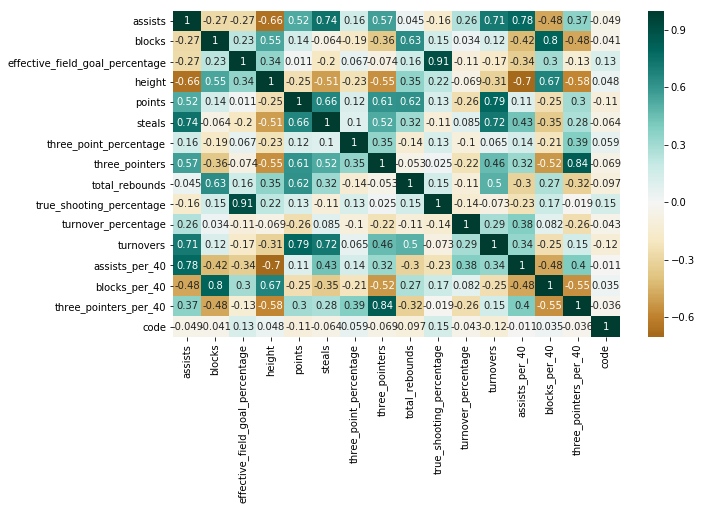

In [55]:
# create heatmap to compare features to the class to determine feature importance
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_1.corr(), center=0, cmap="BrBG", annot=True)

In [56]:
matplotlib.pyplot.savefig

NameError: name 'matplotlib' is not defined

In [39]:
# test set #2
corr_2 = df.drop(["class","player_id","name","college",'true_shooting_percentage','assists_per_40',
            'turnovers','points','blocks_per_40','effective_field_goal_percentage','turnover_percentage',
            'blocks','three_point_percentage','steals','assists','three_pointers_per_40','three_pointers',
            'height','total_rebounds'], axis=1)

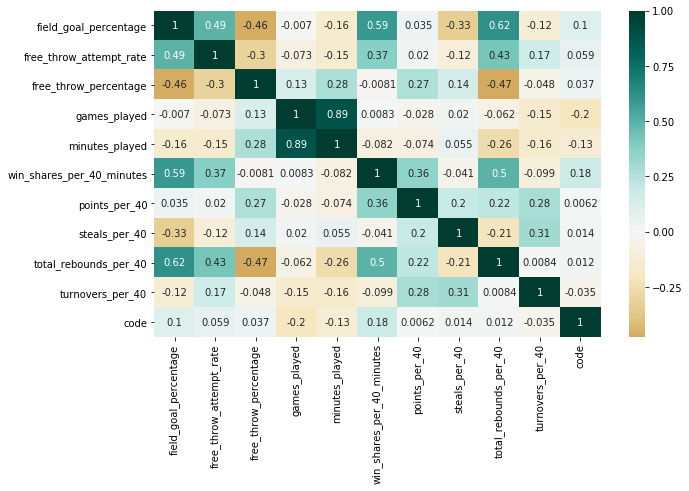

In [40]:
# create heatmap to compare features to the class to determine feature importance
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_2.corr(), center=0, cmap="BrBG", annot=True)

In [41]:
# most important features
features = df.drop(["class","player_id","name","college",'assists_per_40',
            'turnovers','points','blocks_per_40','turnover_percentage',
            'blocks','steals','assists','three_pointers_per_40','three_pointers',
            'total_rebounds', 'free_throw_percentage', 
             'games_played','minutes_played', 'points_per_40','steals_per_40',
            'total_rebounds_per_40','turnovers_per_40'], axis=1)

In [42]:
list(features.columns) 

['effective_field_goal_percentage',
 'field_goal_percentage',
 'free_throw_attempt_rate',
 'height',
 'three_point_percentage',
 'true_shooting_percentage',
 'win_shares_per_40_minutes',
 'code']

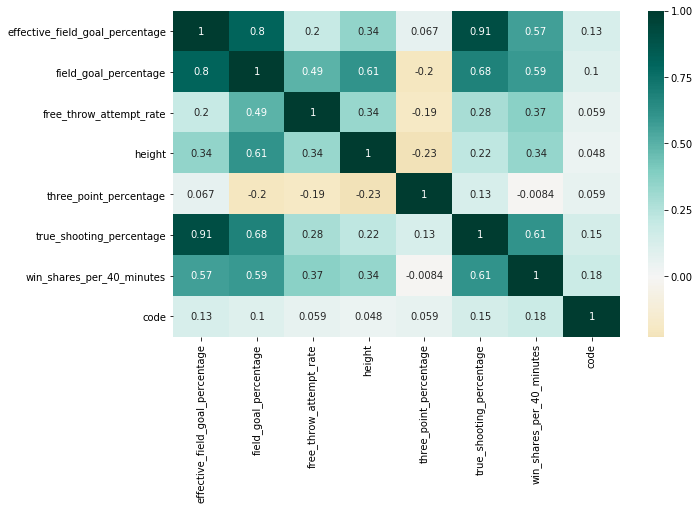

In [43]:
# compare most important features eliminate any that have a high correlation
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(features.corr(), center=0, cmap="BrBG", annot=True)

# Feature comparison for linear regression model

In [45]:
# Read the csv file into a pandas DataFrame

combined_df = pd.read_csv('../combined_data.csv')
combined_df.head()

,win shares,mins played (per game),player,games,year,rank,points(per game),ws/48,box +/-,value overall replacement player,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,48.0,30.6,Kenyon Martin,757,2000,1,12.3,0.100,0.7,15.5,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,0.3,15.6,A.J. Guyton,80,2000,32,5.5,0.010,-5.4,-1.1,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,11.6,14.3,Jake Voskuhl,450,2000,33,4.0,0.087,-2.2,-0.3,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,0.6,18.7,Khalid El-Amin,50,2000,34,6.3,0.030,-3.8,-0.4,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,-0.1,10.6,Mike Smith,17,2000,35,3.0,-0.033,-5.5,-0.2,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [46]:
points_total = combined_df.drop(['win shares','mins played (per game)','player','games','year',
 'rank','points(per game)','ws/48','box +/-','value overall replacement player',
 'team','college','years','mins played (total)','class',
 'player_id','college_id','word','name','assists','blocks','effective_field_goal_percentage',
 'free_throw_percentage','games_played','minutes_played','points','steals',
 'three_pointers','total_rebounds','turnover_percentage','turnovers','assists_per_40',
 'blocks_per_40','points_per_40','steals_per_40','three_pointers_per_40','total_rebounds_per_40',
 'turnovers_per_40'], axis = 1)
                     
points_total.head()

,points (total),field_goal_percentage,free_throw_attempt_rate,height,three_point_percentage,true_shooting_percentage,win_shares_per_40_minutes
0,9325,0.586,0.494,81,0.222000,0.592,0.346
1,442,0.455,0.249,73,0.414000,0.572,0.145
2,1814,0.542,0.555,83,0.329162,0.573,0.237
3,314,0.416,0.257,70,0.355000,0.527,0.158
4,51,0.428,0.357,80,0.318000,0.551,0.165


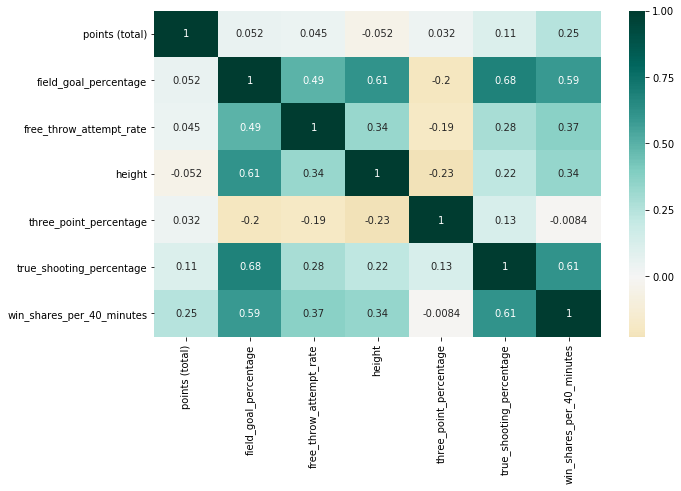

In [47]:
# compare most important features to total points
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(points_total.corr(), center=0, cmap="BrBG", annot=True)

In [ ]:
points_per_game = combined_df.drop(['win shares','mins played (per game)','player','games','year',
 'rank','ws/48','box +/-','value overall replacement player',
 'team','college','years','mins played (total)','points (total)','class',
 'player_id','college_id','word','name','assists','blocks','effective_field_goal_percentage',
 'free_throw_percentage','games_played','minutes_played','points','steals',
 'three_pointers','total_rebounds','turnover_percentage','turnovers','assists_per_40',
 'blocks_per_40','points_per_40','steals_per_40','three_pointers_per_40','total_rebounds_per_40',
 'turnovers_per_40'], axis = 1)
                     
points_per_game.head()

In [ ]:
# compare most important features to points per game
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(points_per_game.corr(), center=0, cmap="BrBG", annot=True)

In [ ]:
ws_48 = combined_df.drop(['win shares','mins played (per game)','player','games','year',
 'rank','points(per game)','box +/-','value overall replacement player',
 'team','college','years','mins played (total)','points (total)','class',
 'player_id','college_id','word','name','assists','blocks','effective_field_goal_percentage',
 'free_throw_percentage','games_played','minutes_played','points','steals',
 'three_pointers','total_rebounds','turnover_percentage','turnovers','assists_per_40',
 'blocks_per_40','points_per_40','steals_per_40','three_pointers_per_40','total_rebounds_per_40',
 'turnovers_per_40'], axis = 1)
                     
ws_48.head()

In [ ]:
# compare most important features to total points
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(ws_48.corr(), center=0, cmap="BrBG", annot=True)

In [ ]:
ws_48 = 'ws_48.sav'
joblib.dump(model_opt,ws_48)